In [366]:
import seaborn as sns # for data visualization
import os
import pprint
import random
import statistics
import scipy.stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob
%matplotlib inline

pp       =  pprint.PrettyPrinter(compact=True)

LOGFILES =  glob.glob('Atlas_kpi_Log_*.json')

print(LOGFILES)

#=== line colors and styles

linestyles = {
    # scenarios
    'empty':        'dotted',
    'canonical':    'dashed',
    'floorplan':    'solid',
     #algorithms
    'Atlas':        'solid',
     #PDRs
    '1':   'solid',
    '0.9': 'solid',
    '0.8': 'solid',
    '0.7': 'solid',
    '0.6': 'solid',
    '0.5': 'solid',
    '0.4': ':',
    '0.3': 'dotted',
    '0.2': '--',
    '0.1': 'dashdot',
}

linecolors = {
    # scenarios
    'empty':        '#262626',
    'canonical':    '#666666',
    'floorplan':    '#ff0000',
    # algorithms
    'Atlas':        '#0000ff',
    # PDRs
     '1':  'royalblue',
     '0.9': 'navy',
     '0.8': 'darkcyan',
     '0.7': 'darkgreen',
     '0.6': 'darkmagenta',
     '0.5': 'r',
     '0.4': 'sienna',
     '0.3': 'firebrick',
     '0.2': 'maroon',
     '0.1': 'purple',
}

#=== helper functions

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m, h)

['Atlas_kpi_Log_210311134114.json']


In [367]:

#=== gather data

log = []
for logfile in LOGFILES:
    with open(logfile,'r') as f:
        for line in f:
            log += [json.loads(line)]
            
lastRunNum = None
runNums    = 0
for run in log:
    if run['runNums']!= lastRunNum:
        runNums      += 1
        lastRunNum    = run['runNums']
            
print('runNums: {} TotalRuns: {}'.format(runNums,len(log)))

runNums: 14 TotalRuns: 14


[[ 480  885 1181 1277 1164 1181  996  972  708  588  468  468  492  516
   588  516  540  161  492  492  740  538  692  492  509  719  845 1144
  1334 1243 2040 2652 2196 2124 1992]
 [ 552   30    4  110   10   76   92    5   57   26   54    3   30   57
    74   38   98   30   50   56    4   56   76    2   30   78   90  133
   126   76   54   94  262  330 2300]
 [ 744  148   15   13   19   87   59   15   29    6    5   29   26    3
    77    2    6   26   51   29    6   51   53   56   30  131   81   11
   204  108   69   99  270  330 2830]
 [ 840   39    6    3    8    9   11    3    9    4    8    4    6    2
     2    2    2    3    2    1    1    6    4    4    9    9    3   11
    11   17   17    9   37   40 2972]
 [1138    9   13   11   14    6    5    5    4    8    2    8    2    3
     3    2    1    1    1    1    3    3    7    3   15    2    6    9
    10   15    8    3   33  332 2388]
 [ 857   79   77   11    5    2    3    5    5    4    2    4    6    8
     4    4    3  

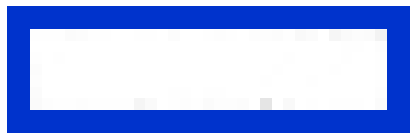

[[1414 1617 2027 2115 2027 1717 1469 1402 1562 1624 1376 1438 1252 1185
   963  999  968 1092 1159 1123 1438 1364 1340 1147 1507 1642 2250 1900
  2537 2524 2115 1588  816  534  800]
 [1159  167   39   15   36   67   70  131  103  132  130   66   66   64
    66    3   68    2   35   34   35   83  254    2   35  112    2   63
    42   54  251    7   95   68  691]
 [1469  101   22    9   13  133   67  130  104  196  196  194  191   99
    35    6   32   97   34   34   32    7  293  162   41  129  169   42
    24   16  117   27  200  142  823]
 [1789    8    9    8    5    7    2    7   71  201    2   41  129    2
     4    1    3    1    3    1    5  110  469  140  225  129   33   13
     2    9   11    4  152   36  877]
 [2380   35   14    7   15    3    6    4 3052 2494 2494  314  192    1
     2    1    1    2    1    3    9    6 3429 2525 2711  591  446    4
     3   10    3    1    6    2  907]
 [1753   79   36    7    6   14   68  130 2425 2425 1805  417   68   10
     6   12    7  

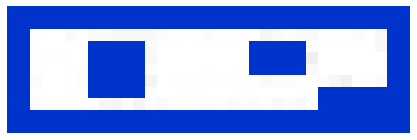

\newcommand{\heatmapMaxNumRobotsemptyAtlas}         {2830\xspace}
\newcommand{\heatmapMaxNumRobotscanonicalAtlas}         {3494\xspace}


In [368]:
'''
###############################################################################
Heatmap
###############################################################################
'''

#=== create plot

maxNumRobots = {}
plotsgenerated = []

for run in log:
    
    # shorthands
    if run['floorplanType'] == 0:
        scenarioName = 'empty'
    elif run['floorplanType'] == 1:
        scenarioName = 'canonical'
    elif run['floorplanType'] == 2:
        scenarioName = 'floorplan'
     
    navAlg = run['navAlgorithm']
    pdr    = run['pdr']
    
    # don't plot same data twice
    if (
        ((scenarioName,navAlg) in plotsgenerated) or
        ('heatmap' not in run)
    ):
        continue
    
    # color cells visited
    data         = np.array(run['heatmap'])
    print(data)
    flat         = data.flatten()
    flat.sort()
    vmax         = flat[-2] # avoid counting num robots on start position
    maxNumRobots[(scenarioName,navAlg)] = vmax
    cmap         = plt.cm.Greys
    norm         = plt.Normalize(0, vmax)
    rgba         = cmap(norm(data))
    
    print(scenarioName,navAlg,vmax)
    
    # color real map
    realMap      = run['floorplanDrawing']
    x = 0
    print(realMap)

    for line in realMap.splitlines():
        if not line.startswith('#'):
            continue
        for (y,c) in enumerate(line):
            if   c=='#':
                rgba[x, y, :3] = ( 0/255,  51/255, 204/255)
        x += 1
    
    (fig,ax) = plt.subplots()
    im       = ax.imshow(rgba, interpolation='nearest')

    fig.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.axis('off')
#     fig.savefig(
#         os.path.join(
#             'plots',
#             'heatmap_{0}_{1}.eps'.format(
#                 scenarioName,
#                 navAlg,
#             ),
#         ),
#         bbox_inches='tight',
#     )
    plt.show()
    
    # remember what I have plotted
    plotsgenerated += [(scenarioName,navAlg)]

for ((scenarioName,navAlg),num) in maxNumRobots.items():
    print('\\newcommand{{\\heatmapMaxNumRobots{}{}}}         {{{}\\xspace}}'.format(scenarioName,navAlg,num))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[3, 2, 1, 1, 1, 1, 1, 1, 1, 1]
min2 [1.4111111111111112, 1.4833333333333334, 1.8, 2.0, 2.533333333333333, 3.2, 4.266666666666667, 5.566666666666666, 8.633333333333333, 19.633333333333333]


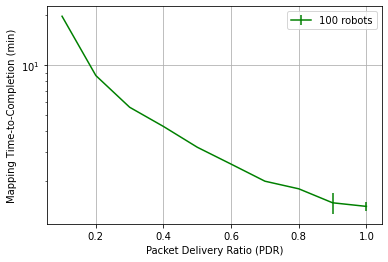

In [362]:
'''
##############################################################################################################
Mapping speed vs PDR for 100 robots 
##############################################################################################################
'''
data_pdr1  = []
data_pdr09 = []
data_pdr08 = []
data_pdr07 = []
data_pdr06 = []
data_pdr05 = []
data_pdr04 = []
data_pdr03 = []
data_pdr02 = []
data_pdr01 = []

for run in log:
    if run['pdr'] == 1:
        data_pdr1 += [run['timeToFullMapping' ]/30]
    if run['pdr'] == 0.9:  
        data_pdr09 += [run['timeToFullMapping']/30]
    if run['pdr'] == 0.8:  
        data_pdr08 += [run['timeToFullMapping']/30]
    if run['pdr'] == 0.7:  
        data_pdr07 += [run['timeToFullMapping']/30]
    if run['pdr'] == 0.6:  
        data_pdr06 += [run['timeToFullMapping']/30]
    if run['pdr'] == 0.5:  
        data_pdr05 += [run['timeToFullMapping']/30]
    if run['pdr'] == 0.4:  
        data_pdr04 += [run['timeToFullMapping']/30]
    if run['pdr'] == 0.3:  
        data_pdr03 += [run['timeToFullMapping']/30]
    if run['pdr'] == 0.2:  
        data_pdr02 += [run['timeToFullMapping']/30]
    if run['pdr'] == 0.1:  
        data_pdr01 += [run['timeToFullMapping']/30]
     
(m1,h1)  =mean_confidence_interval(data_pdr1)
(m09,h09)=mean_confidence_interval(data_pdr09)
(m08,h08)=mean_confidence_interval(data_pdr08)
(m07,h07)=mean_confidence_interval(data_pdr07)
(m06,h06)=mean_confidence_interval(data_pdr06)
(m05,h05)=mean_confidence_interval(data_pdr05)
(m04,h04)=mean_confidence_interval(data_pdr04)
(m03,h03)=mean_confidence_interval(data_pdr03)
(m02,h02)=mean_confidence_interval(data_pdr02)
(m01,h01)=mean_confidence_interval(data_pdr01)  
datas = [data_pdr1,
data_pdr09,
data_pdr08,
data_pdr07,
data_pdr06,
data_pdr05,
data_pdr04,
data_pdr03,
data_pdr02,
data_pdr01]
num_points = [len(data) for data in datas ]
print(num_points)
y = [m1,m09,m08,m07,m06,m05,m04,m03,m02,m01]
print('min2',y)
x = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
yerr= [h1,h09,h08,h07,h06,h05,h04,h03,h02,h01]

#=== create plot
(fig,ax) = plt.subplots()
ax.errorbar(x, y, yerr=yerr,color='green', label = "100 robots")
ax.grid(True, zorder=100)
plt.legend(loc='upper right', fontsize=10, bbox_to_anchor= (1.00, 1.00))
plt.yscale('log')
#plt.title("PDR vs. Mapping Time-to-Completion")
plt.xlabel("Packet Delivery Ratio (PDR)")
plt.ylabel("Mapping Time-to-Completion (min)")
plt.savefig('PDR_vs_time_all_2.eps')


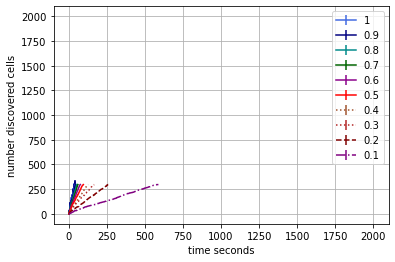

In [363]:
'''
###############################################################################
Mapping Profile
###############################################################################
'''

#=== gather data

data               = {}
scenarioNames      = []
allNumRobots       = []
for run in log:
    if run['floorplanType'] == 0:
        scenarioName = 'empty'
    elif run['floorplanType'] == 1:
        scenarioName = 'canonical'
    elif run['floorplanType'] == 2:
        scenarioName = 'floorplan'
    scenarioNames += [scenarioName]
    
    navAlg = run['navAlgorithm'] 
    pdr    = run['pdr']
    numDotBots      = run['numDotBots']
    allNumRobots  += [numDotBots]
    profile        = run['profile']
    if (scenarioName,numDotBots) not in data:
        data[(scenarioName,numDotBots)] = {}
    if pdr not in data[(scenarioName,numDotBots)]:
        data[(scenarioName,numDotBots)][pdr] = []
    data[(scenarioName,numDotBots)][pdr] += [profile]

for (k1,v1) in data.items():
    for (k2,profiles) in v1.items():
        maxlen  = max(len(p) for p in profiles)
        ms      = []
        hs      = []
        for i in range(maxlen):
            l = []
            for p in profiles:
                try:
                    l += [p[i]]
                except IndexError:
                    pass
            (m,h) = mean_confidence_interval(l)
            ms += [m]
            hs += [h]
        data[k1][k2] = {
            'mean':                ms,
            'confidence_interval': hs,
        }
    
#=== create plot

scenarioNames = set(scenarioNames)
allNumRobots  = set(allNumRobots)

for scenarioName in scenarioNames:
    (fig,ax) = plt.subplots()
    lines    = {}
    for ((scenario,numRobots),v) in data.items():
        if numDotBots!=50:
            continue
        if scenario!=scenarioName:
            continue
        for (pdr,profile) in v.items():
            x             = range(len(profile['mean']))
            y             = profile['mean']
            yerr          = profile['confidence_interval']
            lines[str(pdr)] = ax.errorbar(x=x,y=y,yerr=yerr,color=linecolors[str(pdr)],linestyle=linestyles[str(pdr)],label=pdr)
    ax.grid(True, zorder=5)
    plt.xlabel('time seconds')
    plt.xlim(-100,2100)
    plt.ylabel('number discovered cells')
    plt.ylim(-100,2100)
    plt.legend(handles=[lines['1'],lines['0.9'],lines['0.8'],lines['0.7'], lines['0.6'],lines['0.5'],lines['0.4'],lines['0.3'], lines['0.2'],lines['0.1']])
    plt.show()
    #fig.savefig(os.path.join('plots','mapping_profile_{0}.eps'.format(scenarioName)),bbox_inches='tight')